**Data Preparation**

In [1]:
import nltk
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
import pandas as pd
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import StackingClassifier
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Load datasets
fake_news = pd.read_csv('/content/Fake.csv')
true_news = pd.read_csv('/content/True.csv')

# Remove null values from both datasets
fake_news = fake_news.dropna()
true_news = true_news.dropna()

# Remove duplicates from both datasets based on the 'text' column
fake_news = fake_news.drop_duplicates(subset=['text'])
true_news = true_news.drop_duplicates(subset=['text'])

# Label the datasets
fake_news['label'] = 0
true_news['label'] = 1

# Combine the datasets
data = pd.concat([fake_news, true_news])

In [ ]:
# Optional: Reduce dataset size for memory efficiency
data = data.sample(frac=0.1, random_state=42)  # Use 10% of the data

# Shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

**Pre-processing**

In [ ]:

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define a function to preprocess the text
def preprocess_text(text):
    # Lowercasing
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove extra whitespace
    text = ' '.join(text.split())
    # Tokenize text
    words = word_tokenize(text)
    # Lemmatize words
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    # Join words back to a single string
    return ' '.join(lemmatized_words)

# Apply preprocessing to the 'text' column
data['text'] = data['text'].apply(preprocess_text)

**Feature Engineering**

In [ ]:
# Split the data into features and labels
X = data['text']
y = data['label']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)
#It aims to quantify the importance of a given word relative to other words in the document and in the corpus.

**Model Training and Evaluation**

In [ ]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 96.77%
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       351
           1       0.96      0.98      0.97       422

    accuracy                           0.97       773
   macro avg       0.97      0.97      0.97       773
weighted avg       0.97      0.97      0.97       773



In [ ]:
# Train a Support Vector Machine model
model = SVC(kernel='linear')
model.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 98.19%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       351
           1       0.98      0.99      0.98       422

    accuracy                           0.98       773
   macro avg       0.98      0.98      0.98       773
weighted avg       0.98      0.98      0.98       773



In [ ]:
# Defining base models
base_models = [
    ('logistic_regression', LogisticRegression()),
    ('svm', SVC(kernel='linear', probability=True))  # Set probability=True for SVM to allow prediction probabilities
]

# Defining the meta-model (stacking model)
meta_model = LogisticRegression()

# Define the stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Fit the stacking classifier
stacking_clf.fit(X_train_tfidf, y_train)

# Predict on the test data
y_pred = stacking_clf.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Stacking Classifier: {accuracy * 100:.2f}%')

# Print classification report
print(classification_report(y_test, y_pred))
#Support: The number of actual occurrences of the class in the specified dataset. It tells you how many instances of each class were in the test data

Accuracy of Stacking Classifier: 98.32%
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       351
           1       0.99      0.98      0.98       422

    accuracy                           0.98       773
   macro avg       0.98      0.98      0.98       773
weighted avg       0.98      0.98      0.98       773



**Exploratory Data Analysis**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load datasets
fake_df = pd.read_csv('/content/Fake.csv')
true_df = pd.read_csv('/content/True.csv')

In [ ]:
print(true_df.head())
print(fake_df.head())
print(true_df.info())
print(fake_df.info())


                                               title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017   
3  December 30, 2017   
4  December 29, 2017   
                                               title  \
0   Donald Trump Sends Out Embarrassing Ne

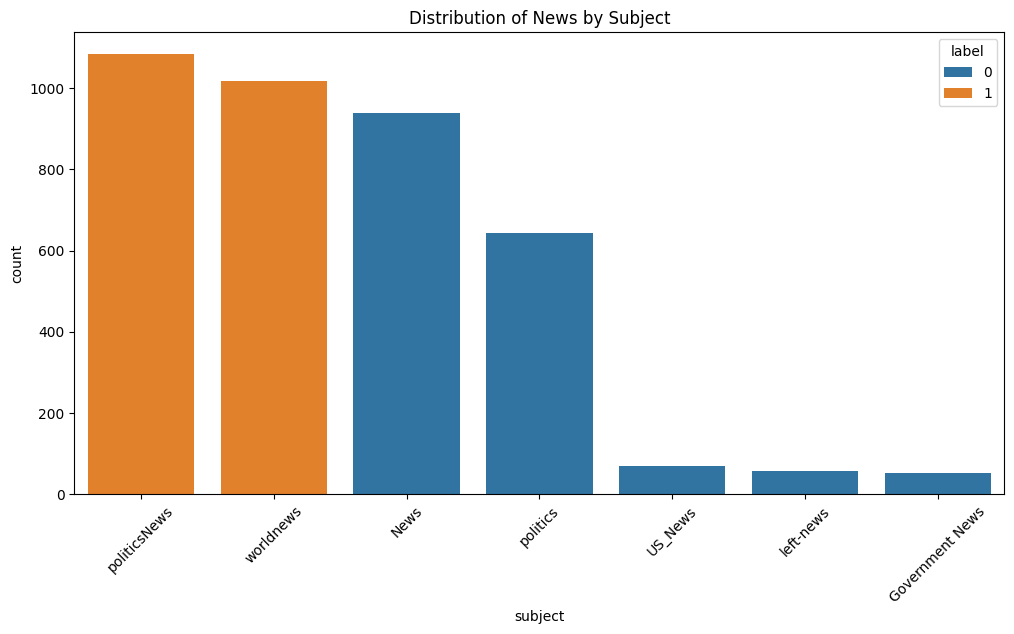

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='subject', hue='label', order=data['subject'].value_counts().index)
plt.title('Distribution of News by Subject')
plt.xticks(rotation=45)
plt.show()


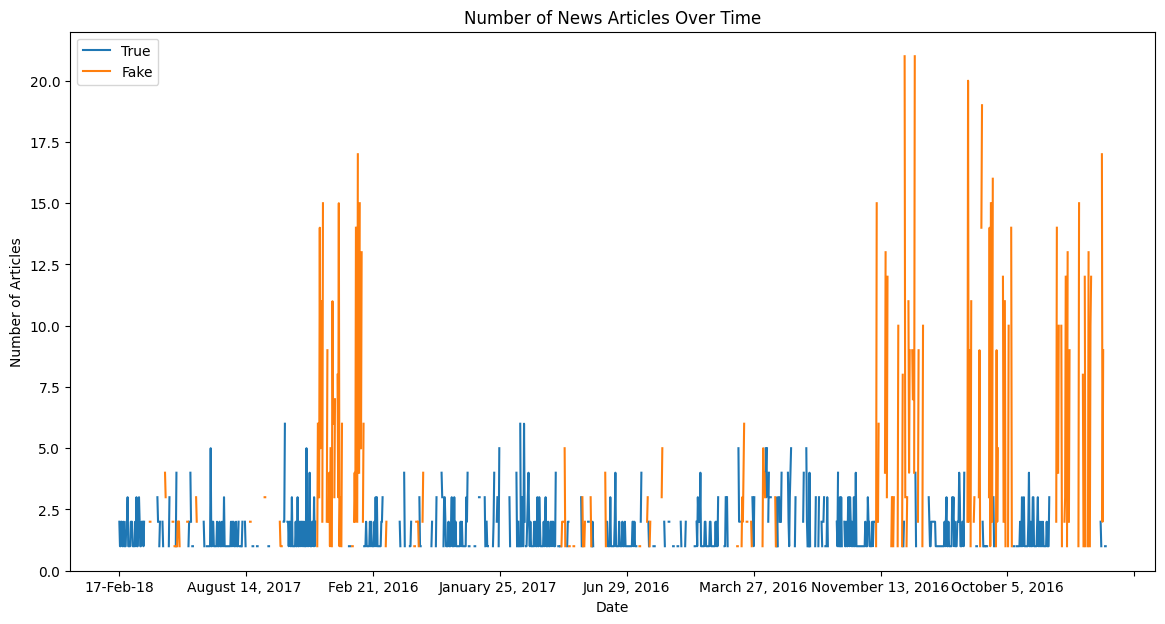

In [ ]:
plt.figure(figsize=(14, 7))
data.groupby(['date', 'label']).size().unstack().plot(kind='line', ax=plt.gca())
plt.title('Number of News Articles Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.legend(['True', 'Fake'])
plt.show()


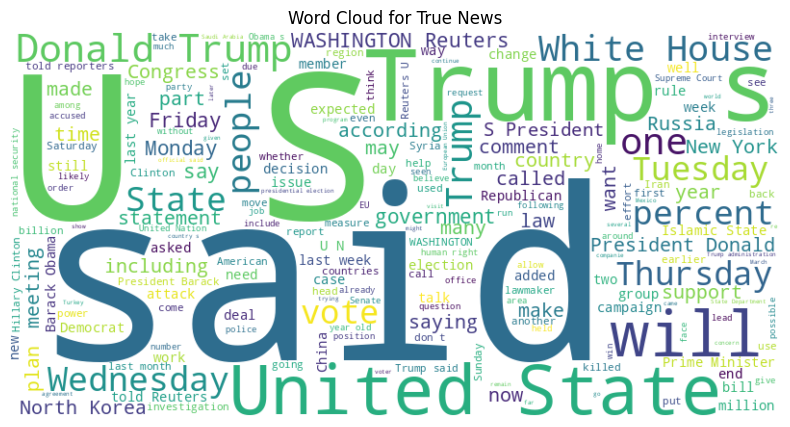

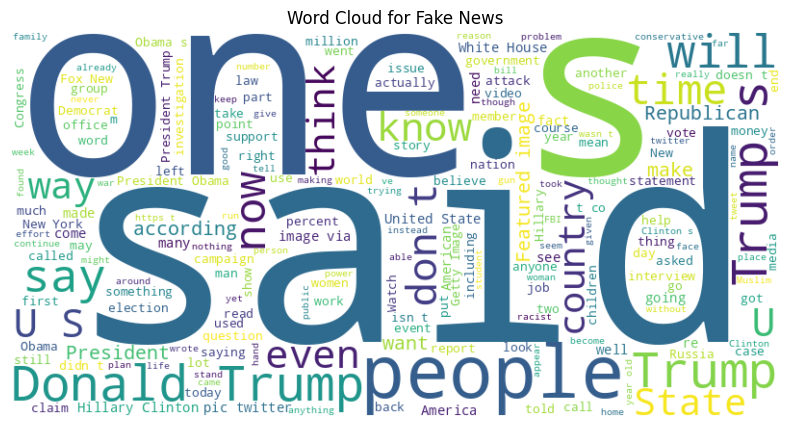

In [ ]:
from wordcloud import WordCloud

# Combine text from True and Fake news
true_text = ' '.join(true_df['text'])
fake_text = ' '.join(fake_df['text'])

# Word Cloud for True News
plt.figure(figsize=(10, 5))
wordcloud_true = WordCloud(width=800, height=400, background_color='white').generate(true_text)
plt.imshow(wordcloud_true, interpolation='bilinear')
plt.title('Word Cloud for True News')
plt.axis('off')
plt.show()

# Word Cloud for Fake News
plt.figure(figsize=(10, 5))
wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_text)
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')
plt.show()


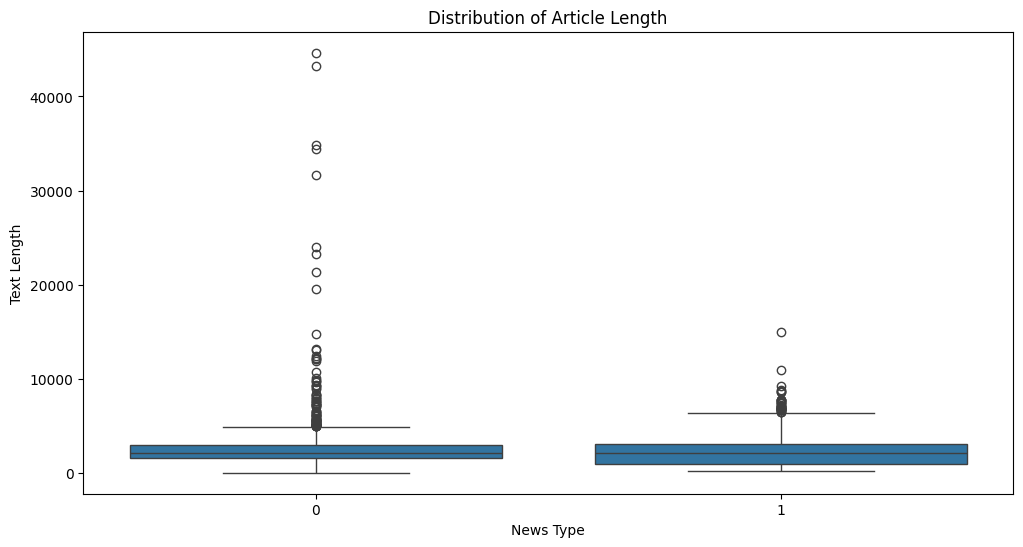

In [ ]:
# Calculate the length of the articles
data['TextLength'] = data['text'].apply(len)

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='label', y='TextLength')
plt.title('Distribution of Article Length')
plt.xlabel('News Type')
plt.ylabel('Text Length')
plt.show()


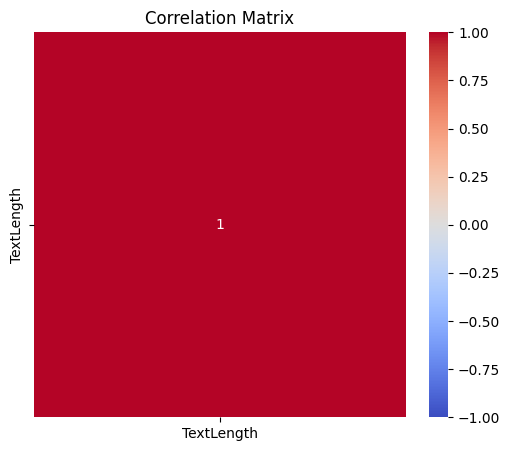

In [ ]:


# Create a correlation matrix
corr_matrix = data[['TextLength']].corr()

plt.figure(figsize=(6, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()


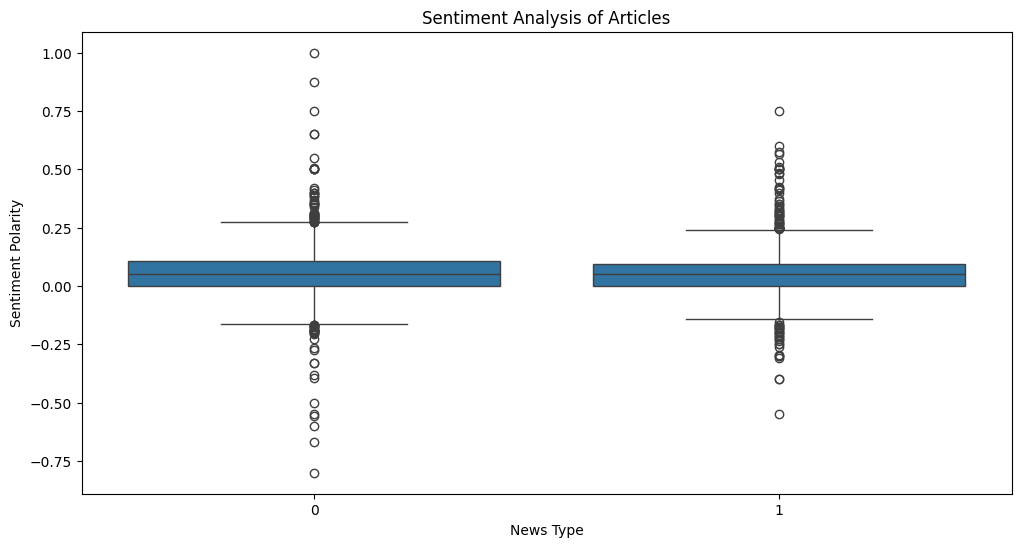

In [ ]:
from textblob import TextBlob

# Add sentiment columns
data['Sentiment'] = data['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='label', y='Sentiment')
plt.title('Sentiment Analysis of Articles')
plt.xlabel('News Type')
plt.ylabel('Sentiment Polarity')
plt.show()


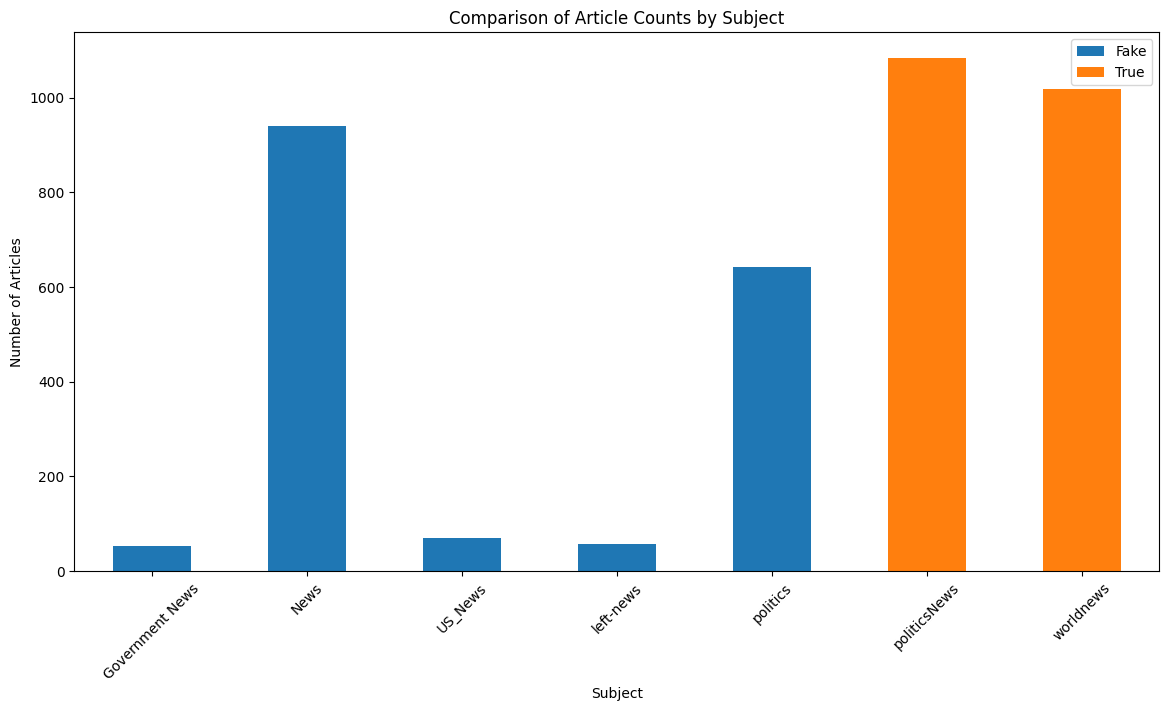

In [ ]:
plt.figure(figsize=(14, 7))
subject_counts = data.groupby(['subject', 'label']).size().unstack().fillna(0)
subject_counts.plot(kind='bar', stacked=True, ax=plt.gca())
plt.title('Comparison of Article Counts by Subject')
plt.xlabel('Subject')
plt.ylabel('Number of Articles')
plt.legend(['Fake', 'True'])
plt.xticks(rotation=45)
plt.show()
